# Analysis of the SisFall Dataset for Fall Detection
#### A dataset of performed trials of activities of daily living (ADLs) and falls with subjects wearing two triaxis accelerometers and a gyroscope.

## Matthew Johnson
#### July 25, 2018


##### Sources:<br>
* [1] **Automatic Fall Monitoring: A Review**<br>
  *Natthapon Pannurat, Surapa Thiemjarus, and Ekawit Nantajeewarawat*
* [2] **Real-life/real-time elderly fall detection with a triaxial accelerometer**<br>
 *A. Sucerquia, J.D. López and J.F. Vargas-Bonilla*
* [3] **SisFall: A Fall and Movement Dataset**<br>
 *A. Sucerquia, J.D. López and J.F. Vargas-Bonilla*
* [4] **Fall-Detection Algorithm Using 3-Axis Acceleration: Combination with Simple Threshold and Hidden Markov Model**<br>
 *Dongha Lim, Chulho Park, Nam Ho Kim, Sang-Hoon Kim, and Yun Seop Yu*

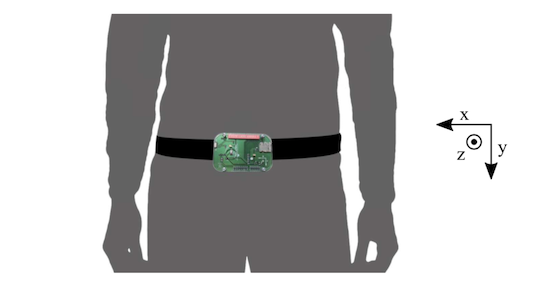

In [819]:
from IPython.display import Image
Image(filename='/Users/mattjohnson/Desktop/Python 2018/Untitled Folder/img5.png') # [3] 

## Activities of Daily Living (ADLs):

-----------

| Code | Activity | # trials | length of trial |
---|---|---
| D01  | Walking slowly | 1      | 100s     |
| D02  | Walking quickly | 1      | 100s     |
| D03  | Jogging slowly | 1      | 100s     |
| D04  | Jogging quickly | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly | 5      | 12s|
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly| 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair| 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again | 5      | 12s      |
| D14  | Being on oneís back change to lateral position, wait a moment, and change to oneís back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car | 5      | 25s      |
| D18  | Stumble while walking | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)| 5      | 12s      |

## Falls:

-----------

| Code | Activity | # trials | length of trial |
---|---|---
| F01  | Fall forward while walking caused by a slip| 5      | 15s      |
| F02  | Fall backward while walking caused by a slip| 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip| 5      | 15s      |
| F04  | Fall forward while walking caused by a trip| 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip| 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting| 5      | 15s      |
| F08  | Fall forward when trying to get up| 5      | 15s      |
| F10  | Fall forward when trying to sit down | 5      | 15s      |
| F11  | Fall backward when trying to sit down | 5      | 15s      |
| F09  | Lateral fall when trying to get up | 5      | 15s      |
| F12  | Lateral fall when trying to sit down | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep| 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep| 5      | 15s |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep| 5      | 15s      |

#### Subjects SA01-SA09:

-----------

| Subject | Age | Height | Weight | Gender |
---|---|---
| SA01    | 26  | 165    | 53     | F      |
| SA02    | 23  | 176    | 58.5   | M      |
| SA03    | 19  | 156    | 48     | F      |
| SA04    | 23  | 170    | 72     | M      |
| SA05    | 22  | 172    | 69.5   | M      |
| SA06    | 21  | 169    | 58     | M      |
| SA07    | 21  | 156    | 63     | F      |
| SA08    | 21  | 149    | 41.5   | F      |
| SA09    | 24  | 165    | 64     | M      |

#### For computational reasons I currently only have the first subject's data loaded up:

In [585]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
import time
warnings.filterwarnings('ignore')

path = '/Users/mattjohnson/Desktop/Python 2018/Untitled Folder/SubjectDataFrames/acm_SA0'

subjectList = []

for i in range(1,2):
    data = pd.read_csv(path + str(i) + '.csv')
    data = data.drop('Unnamed: 0', axis=1)
    df = data[ ['x1', 'y1', 'z1', 'x2', 'y2', 'z2','activity', 'subject', 'trial']]
    subjectList.append(df)

In [586]:
# Titles for fall activities
fall_titles = ['Fall forward while walking caused by a slip', 'Fall backward while walking caused by a slip', 
    'Lateral fall while walking caused by a slip', 'Fall forward while walking caused by a trip', 
    'Fall forward while jogging caused by a trip', 'Vertical fall while walking caused by fainting',
    'Fall while walking, with use of hands in a table to dampen fall, caused by fainting'
    'Fall forward when trying to get up', 'Lateral fall when trying to get up', 
    'Fall forward when trying to sit down', 'Fall backward when trying to sit down', 'Lateral fall when trying to sit down',
    'Fall forward while sitting, caused by fainting or falling asleep',
    'Fall backward while sitting, caused by fainting or falling asleep',
    'Lateral fall while sitting, caused by fainting or falling asleep']
# Titles for ADLs
adl_titles = ['Walking slowly', 'Walking quickly', 'Jogging slowly', 'Jogging quickly', 'Walking upstairs and downstairs slowly',
    'Walking upstairs and downstairs quickly','Slowly sit in a half height chair, wait a moment, and up slowly',
    'Quickly sit in a half height chair, wait a moment, and up quickly',
    'Slowly sit in a low height chair, wait a moment, and up slowly','Quickly sit in a low height chair, wait a moment, and up quickly',
    'Sitting a moment, trying to get up, and collapse into a chair',
    'Sitting a moment, lying slowly, wait a moment, and sit again','Sitting a moment, lying quickly, wait a moment, and sit again',
    'Being on oneís back change to lateral position, wait a moment, and change to oneís back',
    'Standing, slowly bending at knees, and getting up', 'Standing, slowly bending without bending knees, and getting up',
    'Standing, get into a car, remain seated and get out of the car','Stumble while walking',
    'Gently jump without falling (trying to reach a high object)']

#### Plotting and filter methods:

- get_trial_time(index, kind)
- plot_trials(index, kind)
- plot_one_from_each(index, kind)
- plot_feats(index, kind)
- plot_trial(index, trialIndex, kind)

In [785]:
dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']
falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']

fs = 200.0 # frequency samplet

def get_trial_time(index, kind):
    
    r=5
    if kind == 'f':
        n = 3000.0
        t = np.linspace(0, 15.0,n, endpoint=False)
    else:
        if index in list(range(0,4)):
            T = 100 # seconds
        elif index in [4, 5, 16]:
            T = 25 
        else: T = 12
        
        n = int(T * fs) # total number of samples
        t = np.linspace(0, T, n, endpoint=False)
                
        if index <= 3: 
            r = 1 
                    
    return t, int(n), int(r)
    
## index w <-- activity = F[w+1], eg. index=4 gives a df that contains activity F05 
## This makes sense since data_list[0] contains activity F01

def plot_trials(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
                
    new_df = correctList[index]
    t, n, r = get_trial_time(index, kind)
    
    T = int(n/fs)
    l = list( range(0, int(1000*T), int(1000*0.625)))
    l = np.array(l)/1000
    xcoords = list(l)
    #st = str(new_df['subject'].values[0])
    
    plt.figure(figsize=( 15, 2*r))

    for i in range(0,r):
        curr_df = new_df[i*n:i*n+n]
        if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
        plt.subplot(r, 1, i+1)
        plt.plot(t, curr_df['fx'], 'b-', label='x')
        plt.plot(t, curr_df['fy'], 'r-', label='y')
        plt.plot(t, curr_df['fz'], 'y-', label='z')
        for xc in xcoords:
            plt.axvline(x=xc)
        plt.grid()
        labs = list(range(0,len(xcoords)-2))
        plt.xticks(xcoords, labs)
        plt.legend()
        plt.ylabel('trial'+ str(i+1))
        if i == 0: 
            plt.title(  ''+ correctCodes[index] + ':' + correctTitles[index] )

        tempA = FTL[5*index+i]
        if len(tempA)>0:
            shadeStart = tempA[0]
            shadeFin = tempA[len(tempA)-1]+2
            plt.axvspan(shadeStart*.625, shadeFin*.625, color='red', alpha=0.5)
        
    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
def plot_one_from_each(index, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
            
    plt.figure(figsize=(15,10))
        
    for i in range(0,5):
        if (index+i+1)==len(correctList): return
        new_df = correctList[index+i]
        t, n, r = get_trial_time(index, kind)

        try:
            curr_df = new_df[0:n]
            if len(curr_df) != n:
                curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
            plt.subplot(5, 1, i+1)
            plt.plot(t, curr_df['bx'], 'b-', label='x')
            plt.plot(t, curr_df['by'], 'r-', label='y')
            plt.plot(t, curr_df['bz'], 'y-', label='z')
            plt.grid()
            plt.legend()
            plt.ylabel('Acc')
            plt.title( correctCodes[index + i] + ' ' + correctTitles[index + i])
        except:
            print('')
            
    plt.subplots_adjust(hspace=0.4)
    plt.show()    
    
def plot_feats(index, kind):

    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
        
    t, n, r = get_trial_time(index, kind)
    
    curr_df = correctList[index][0:int(n)]
    feat_list = ['vector_mag', 'vector_mag2', 'horiz_mag', 'vert', 'std_mag', 'horiz_std_mag',
                 'peak_diff', 'HorizSigMagArea', 'angle_from_horiz']
    colour_list = ['b-', 'r-', 'k-', 'c-', 'C2', 'C4', 'C1', 'C5', 'C6']

    x = len(feat_list)
    plt.figure(figsize=(15,2*x))
    
    for i, feat, colour in zip(range(0,x), feat_list, colour_list):
        plt.subplot(x, 1, i+1)
        plt.plot(t, curr_df[feat], colour, label=feat)
        plt.grid()
        plt.legend()
        plt.ylabel(feat)
        if i==0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    plt.subplots_adjust(hspace=0.35)
    plt.show() 
    
def plot_trial(index, tri, kind):
    
    if kind == 'f': 
        correctList, correctTitles, correctCodes = fall_df_list, fall_titles, falls
    else: 
        correctList, correctTitles, correctCodes = adl_df_list, adl_titles, dailies
                
    new_df = correctList[index]
    
    t, n, r = get_trial_time(index, kind)
    plt.figure(figsize=( 15, 24))

    xtypes = ['ax', 'fx', 'bx', 'gx']
    ytypes = ['ay', 'fy', 'by', 'gy']
    ztypes = ['az', 'fz', 'bz', 'gz']
    ylabs = ['raw acc (m/s^2)', 'filtered', 'filt differential', 'gyro']
    for i in range(0,len(xtypes)):
        curr_df = new_df[tri*n:tri*n+n]
        if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
        plt.subplot(12, 1, i+1)
        plt.plot(t, curr_df[xtypes[i]], 'b-', label='x')
        plt.plot(t, curr_df[ytypes[i]], 'r-', label='y')
        plt.plot(t, curr_df[ztypes[i]], 'y-', label='z')
        plt.grid()
        plt.legend()
        plt.ylabel(ylabs[i])
        if i == 0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    curr_df = correctList[index][0:int(n)]
    if len(curr_df) != n:
            curr_df = curr_df.append(curr_df.iloc[len(curr_df)-1])
            
    feat_list = ['vector_mag', 'vector_mag2', 'horiz_mag', 'vert', 'std_mag', 'horiz_std_mag', 
                 'peak_diff', 'HorizSigMagArea', 'angle_from_horiz', 'gyro_horiz_std_mag']
    colour_list = ['b-', 'r-', 'k-', 'c-', 'C2', 'C4', 'C1', 'C5', 'C6', 'C7']

    x = len(feat_list) + len(xtypes)
    plt.figure(figsize=(15,2*x))
    
    for i, feat, colour in zip(range(0,x), feat_list, colour_list):
        plt.subplot(12, 1, i+1)
        plt.plot(t, curr_df[feat], colour, label=feat)
        plt.grid()
        plt.legend()
        plt.ylabel(feat)
        if i==0: plt.title( correctCodes[index] + ' ' + correctTitles[index])

    plt.subplots_adjust(hspace=0.35)
    plt.show()
    
from scipy.signal import butter, lfilter, freqz
# Filter requirements.
order = 4
fs = 200.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

# From??????
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

#### Data preparation methods:

- sliding_window(dataframe, kind)
- prepare_data(kind)

In [589]:
# Codes for trials
trials = ['R01', 'R02', 'R03', 'R04', 'R05']

# Lists to hold prepared fall and ADL dataframes
fall_df_list = []
adl_df_list = []
# Lists to hold sliding windows of 1.25s with a 50% overlap
windowList_adl = []
windowList_fall = []

# Method that takes in a dataframe and kind=['f', 'a'] and stores sliding windows of 1.25s 
# with a 50% overlap
def sliding_window(dataframe, kind):           
            
    for i in range(0, len(dataframe)-256, 128):
        w = 256 # Size of sliding window (256 points at 200Hz = 1.25 seconds)
        w1 = dataframe.iloc[i:i+w][:] 
        w1['Fall'] = 0 # Have to change some to 1 later
        
        if kind=='f': # If fall
            windowList_fall.append(w1)
        else:  # If ADL
            windowList_adl.append(w1)

# Method that takes in a kind=['f', 'a'] and prepares respective data
def prepare_data(kind):
        
    if kind == 'f': # If fall 
            putList, takeList = fall_df_list, fall_list
    else:  # If ADL
            putList, takeList = adl_df_list, adl_list
        
    start = time.time() # Timer for testing
    
    for i in range(0,len(takeList)): # Iterate through the takeList (fall_list or adl_list)
        
        my_df = takeList[i].copy() # copy dataframe from list
        new_df = pd.DataFrame() # placeholder
    
        for trial in trials: # Iterate through trials (1-5)
    
            # Get relevant trial data
            trial_df = my_df[ my_df['trial']==trial ]
            
            tempdf = pd.DataFrame() # dataframe for putting into filter
            # Low Pass Buttersworth Filter and remove bias
            tempdf['ax'], tempdf['ay'], tempdf['az'] = trial_df['x1'], trial_df['y1'], trial_df['z1']
            tempdf = tempdf.reset_index(drop=True)
            tempdf['fx'] = pd.Series(butter_lowpass_filter( trial_df['x1'], cutoff, fs, order))
            tempdf['fy'] = pd.Series(butter_lowpass_filter( trial_df['y1'], cutoff, fs, order))
            tempdf['fz'] = pd.Series(butter_lowpass_filter( trial_df['z1'], cutoff, fs, order))
            tempdf['bx'] = tempdf['fx'].diff()
            tempdf['by'] = tempdf['fy'].diff()
            tempdf['bz'] = tempdf['fz'].diff()

            tempdf = tempdf.reset_index(drop=True)
            trial_df = trial_df.reset_index(drop=True)
            tempdf['gx'], tempdf['gy'], tempdf['gz'] = trial_df['x2'], trial_df['y2'], trial_df['z2']

            # Rolling averages
            tempdf['y_roll'] = pd.Series(tempdf['by'].rolling(200).mean())
            tempdf['fy_roll'] = pd.Series(tempdf['fy'].rolling(200).mean())
            tempdf['gy_roll'] = pd.Series(tempdf['by'].rolling(200).mean())            
            
            # Rolling standard deviations
            tempdf['bx_std'] = pd.rolling_std(tempdf['bx'], 200)
            tempdf['by_std'] = pd.rolling_std(tempdf['by'], 200)
            tempdf['bz_std'] = pd.rolling_std(tempdf['bz'], 200)
            tempdf['fx_std'] = pd.rolling_std(tempdf['fx'], 200)
            tempdf['fy_std'] = pd.rolling_std(tempdf['fy'], 200)
            tempdf['fz_std'] = pd.rolling_std(tempdf['fz'], 200)
            tempdf['gx_std'] = pd.rolling_std(tempdf['fx'], 200)
            tempdf['gy_std'] = pd.rolling_std(tempdf['fy'], 200)
            tempdf['gz_std'] = pd.rolling_std(tempdf['fz'], 200)
        
            # Integral stuff
            tempdf['xsum'] = pd.expanding_sum(((abs(tempdf['ax']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['ysum'] = pd.expanding_sum(((abs(tempdf['ay']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['zsum'] = pd.expanding_sum(((abs(tempdf['az']).rolling(2).sum()/2)*(1/200)).fillna(0))
            tempdf['time'] = 1/200
            tempdf['time'] = pd.expanding_sum(tempdf['time'])
            # C10 Signal Magnitude Area
            tempdf['SigMagArea'] = (tempdf['xsum'] + tempdf['ysum'] + tempdf['zsum']) / tempdf['time']
            # C11
            tempdf['HorizSigMagArea'] = (tempdf['xsum'] + tempdf['zsum']) / tempdf['time']
            # Sum vector magnitude
            tempdf['vm'] = np.sqrt( tempdf['fx']**2 + tempdf['fy']**2 + tempdf['fz']**2 )
            # Maximum peak to peak acceleration amplitude
            tempdf['Amax'] = (tempdf['vm'].rolling(200).max())
            tempdf['Amin'] = (tempdf['vm'].rolling(200).min())
            # C3
            tempdf['peak_diff'] = tempdf['Amax']-tempdf['Amin']
            # Angle from horizontal to z-axis
            tempdf['angle_from_horiz'] = np.arctan2( np.sqrt(tempdf['fx']**2 + tempdf['fz']**2), -tempdf['fy']) * 180 / np.pi
            tempdf['angle_std'] = pd.rolling_std(tempdf['angle_from_horiz'], 200)
            
            # had to make versions of this to put into sliding window, will change once I
            # confirm they're the same as the others below
            tempdf['horiz_std_mag9'] = np.sqrt(tempdf['fx_std']**2 + tempdf['fz_std']**2 )
            tempdf['horiz_vector_mag9'] = np.sqrt( tempdf['fx']**2 + tempdf['fz']**2 )
            tempdf['std_mag9'] = np.sqrt( tempdf['fx_std']**2 + tempdf['fy_std']**2 + tempdf['fz_std']**2 )
            tempdf['diff_std_mag9'] = np.sqrt( tempdf['bx_std']**2 + tempdf['by_std']**2 + tempdf['bz_std']**2 )
        
            tempdf = pd.concat([tempdf.reset_index(drop=True), trial_df[['activity', 'subject', 'trial']].reset_index(drop=True)], axis=1)
            new_df = pd.concat([new_df.reset_index(drop=True), tempdf])
        
            if kind == 'f': # currently only calling on falls
                sliding_window(tempdf, kind)
                
        #differential vector mag
        new_df['vector_mag2'] = np.sqrt( new_df['bx']**2 + new_df['by']**2 + new_df['bz']**2 )
        new_df['vector_mag'] = np.sqrt( new_df['fx']**2 + new_df['fy']**2 + new_df['fz']**2 )
        new_df['gyro_vector_mag'] = np.sqrt( new_df['gx']**2 + new_df['gy']**2 + new_df['gz']**2 )

        new_df['horiz_mag2'] = np.sqrt( new_df['bx']**2 + new_df['bz']**2 )
        new_df['gyro_horiz_mag'] = np.sqrt( new_df['gx']**2 + new_df['gz']**2 )

        # C2
        new_df['horiz_mag'] = np.sqrt( new_df['fx']**2 + new_df['fz']**2 )

        new_df['vert'] = new_df['by'] - new_df['y_roll']
        new_df['vert2'] = new_df['ay'] - new_df['y_roll']
        new_df['vert3'] = new_df['fy'] - new_df['fy_roll']

        # C9
        new_df['std_mag2'] = np.sqrt( new_df['bx_std']**2 + new_df['by_std']**2 + new_df['bz_std']**2 )
        new_df['gyro_std_mag'] = np.sqrt( new_df['gx_std']**2 + new_df['gy_std']**2 + new_df['gz_std']**2 )
        # C8
        new_df['horiz_std_mag2'] = np.sqrt( new_df['bx_std']**2 + new_df['bz_std']**2 )
        new_df['gyro_horiz_std_mag'] = np.sqrt( new_df['gx_std']**2 + new_df['gz_std']**2 )

        putList.append(new_df.fillna(0))

    print ('Completed... It took', time.time()-start, 'seconds.')

## Start

In [595]:
# Codes for ADLs
dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']
# Codes for Falls
falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']

# Lists to hold dataframes sorted by activity (ADLs and Falls)
adl_list = []
fall_list = []

# Iterate through subject data and sort into ADLs and Falls
for s in subjectList:
    for d in dailies:
        tempdf = s[ s['activity']==d]
        adl_list.append(tempdf)
    
    for f in falls:
        tempdf = s[ s['activity']==f]
        fall_list.append(tempdf)

In [590]:
prepare_data('f') # Prepare Fall Data
prepare_data('a') # Prepare ADL Data

Completed... It took 435.47369503974915 seconds.
Completed... It took 4.317948341369629 seconds.


In [810]:
print('ADL dataframes:',len(adl_df_list), '\tFall dataframes:', len(fall_df_list))
print('ADL windows:', len(windowList_adl), '\t\tFall windows:', len(windowList_fall))

ADL dataframes: 19 	Fall dataframes: 15
ADL windows: 0 		Fall windows: 1650


In [597]:
wList_f = windowList_fall[:]     # Copy of fall window list
fall_dfs_copy = fall_df_list[:]  # Copy of fall dataframes
adl_dfs_copy = adl_df_list[:]    # Copy of ADL dataframes

# putting together falls and adls
fall_df = pd.concat(fall_df_list)
adl_df = pd.concat(adl_df_list)
all_df = pd.concat([fall_df, adl_df]).fillna(0) # Filling nulls with zeroes

# *** need to change **** List Comprehension for fall column 
all_df['Fall'] = [1 if x in falls else 0 for x in all_df['activity']]

#### Very poor implementation of a way to check and mark thresholds on each window for marking falls and plotting (see below):

In [775]:
horiz_std_mag_THRESHOLD = 155      # Set threshold for Horizontal Standard Deviation Magnitude
horiz_vec_mag_THRESHOLD = 400      # Set threshold for Horizontal Sum Vector Magnitude
vector_mag_THRESHOLD = 750         # Set threshold for Sum Vector Magnitude
belowThresh = 0        # Keep track of windows below thresholds
aboveThresh = 0        # Keep track of windows above thresholds
i=0 # placeholder
lastActInd = 0 # Last activity index
lastTrialNum = 0 # Last trial number
fallTrialList = [] #
listInFallTrialList = [] # 

for window in wList_f: # Iterate through fall windows
    
    windNum = i           # Set window index
    respWindNum = i%22  #  Set respective window index (0-21)
    activityIndex = int(i/(22*5)) # Calculate activity index (0-13/14?)
    trialNum = (int(i/22))% 5    # Calculate trial number (0-4)

    # Custom setting for thresholds, currently need to pass 2/3 thresholds to pass 
    if ((window['horiz_std_mag9'].max() >= horiz_std_mag_THRESHOLD)*1 + (window['horiz_vector_mag9'].max() >= horiz_vec_mag_THRESHOLD)*1
       + (window['vm'].max() >= vector_mag_THRESHOLD)*1 >= 2):
        
        aboveThresh+=1
    
        if (activityIndex == lastActInd) :
            if (trialNum == lastTrialNum): 
                listInFallTrialList.append(respWindNum)
                lastTrialNum = trialNum
                lastActInd=activityIndex
            else:
                fallTrialList.append( listInFallTrialList )
                listInFallTrialList = []
                listInFallTrialList.append(respWindNum)
                lastActInd=activityIndex
                diff = (trialNum-lastTrialNum)
                absdiff = diff % 5

                if absdiff>1:
                    for j in range(absdiff-1):
                        fallTrialList.append([])
                        
                lastTrialNum = trialNum 

        else:
            diff = (trialNum-lastTrialNum) 
            absdiff = diff % 5
            activity_diff = (activityIndex-lastActInd)
            if (activity_diff>0) & (trialNum !=0):
                for k in range(3-absdiff):
                    fallTrialList.append([])
            if absdiff>1:
                for j in range(absdiff-1):
                    fallTrialList.append([])
            fallTrialList.append( listInFallTrialList )
            listInFallTrialList = []
            listInFallTrialList.append(respWindNum)
            lastTrialNum = trialNum 
            lastActInd=activityIndex
    else:
        belowThresh+=1
        
    i+=1

fallTrialList.append( listInFallTrialList )

print('below:', belowThresh)
print('above:', aboveThresh)

FTL = fallTrialList[:]

below: 1507
above: 143


#### All numbered vertical lines are  128 points or 0.625 seconds apart. Therefore, the 0th window goes from 0-2, the 1st from 1-3, ... , up until the 21st.

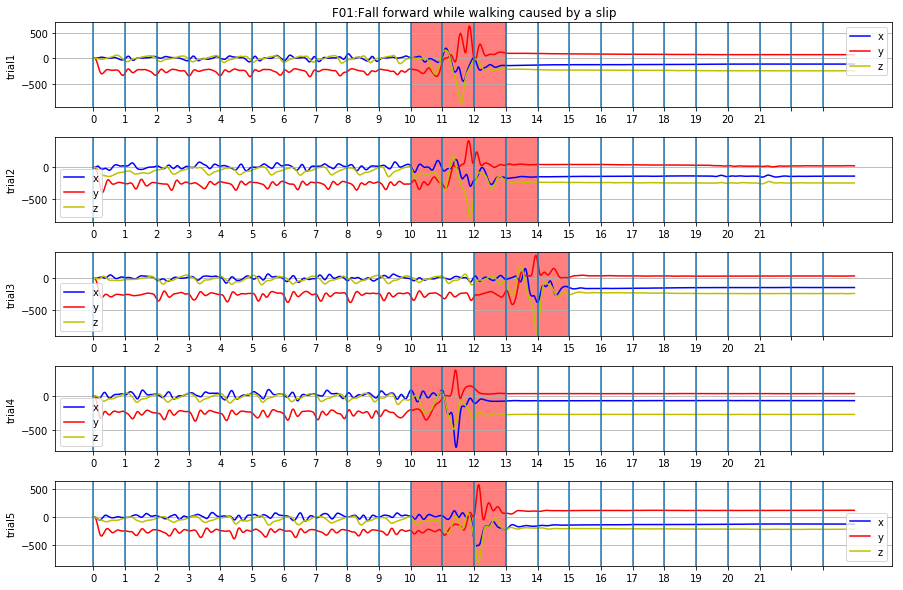

In [751]:
plot_trials(0, 'f')

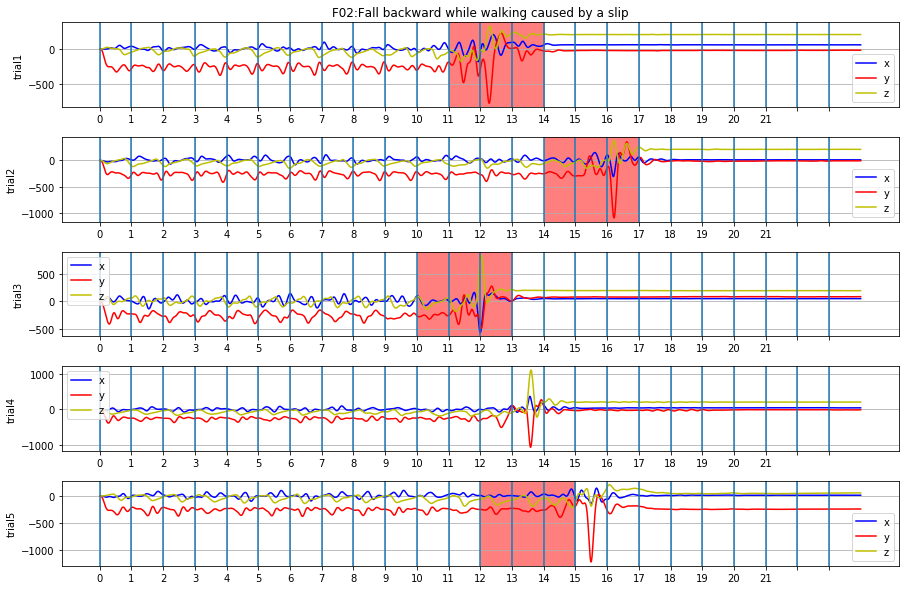

In [752]:
plot_trials(1, 'f')

#### It seems we missed a fall on F02 - Trial 5, let's take a closer look:

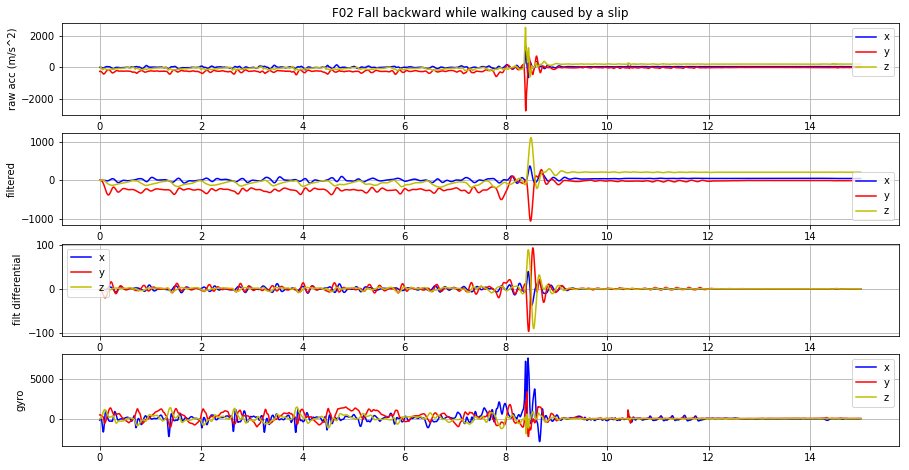

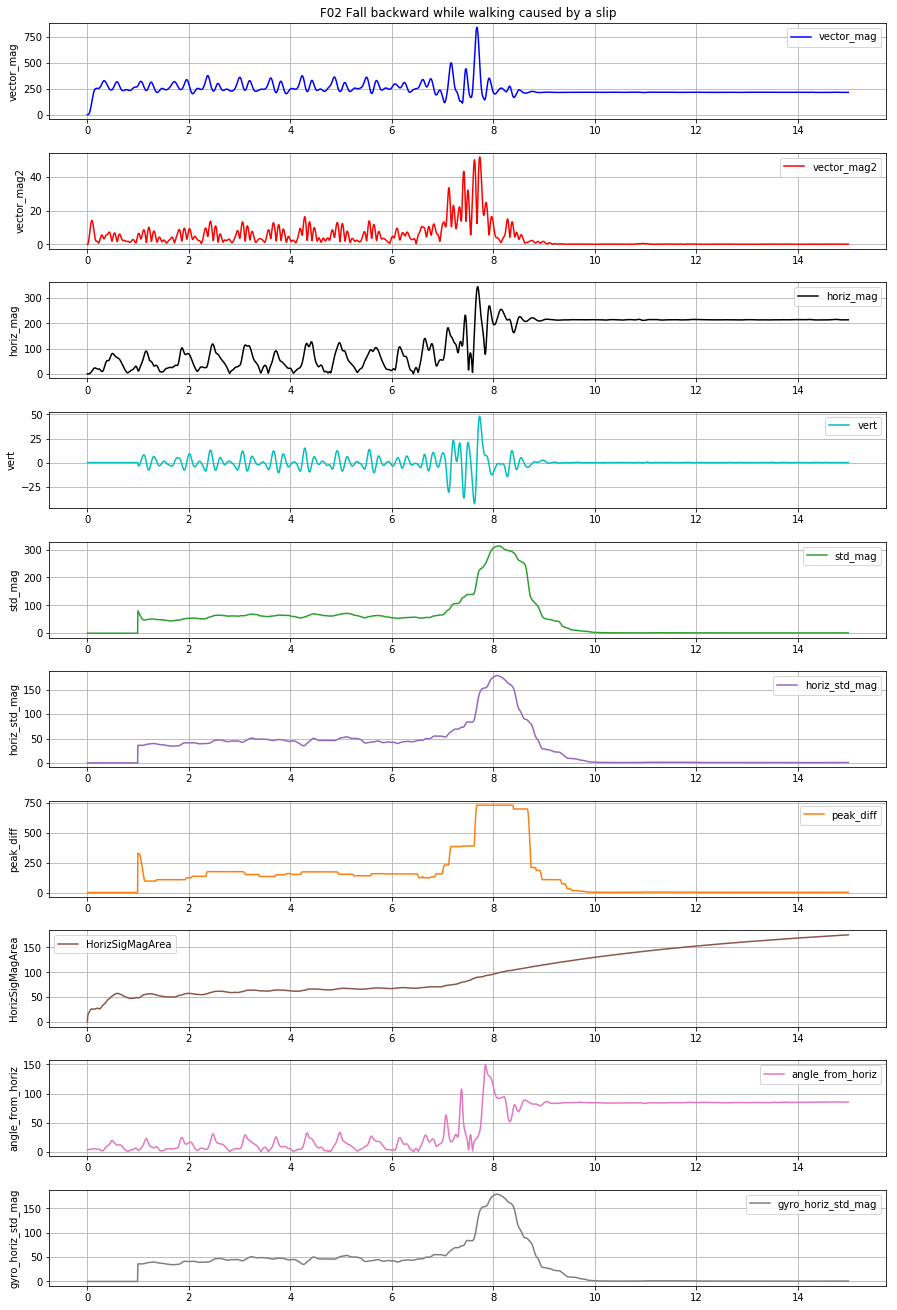

In [788]:
plot_trial(1, 3, 'f')

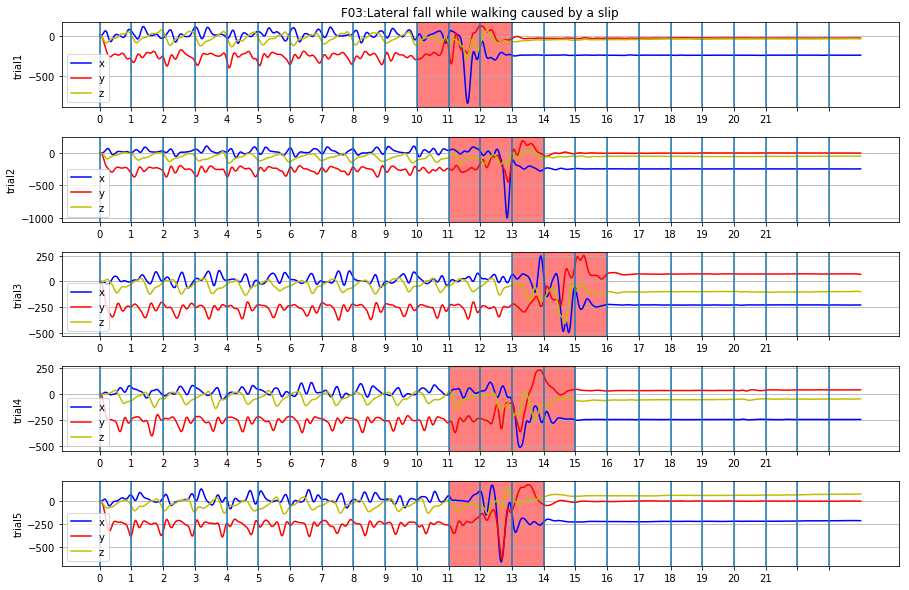

In [753]:
plot_trials(2, 'f')

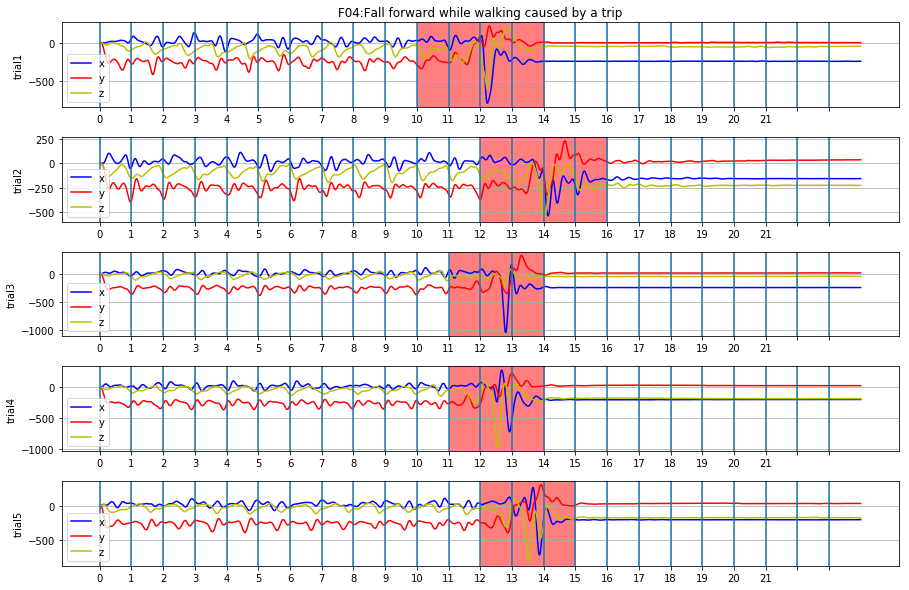

In [754]:
plot_trials(3, 'f')

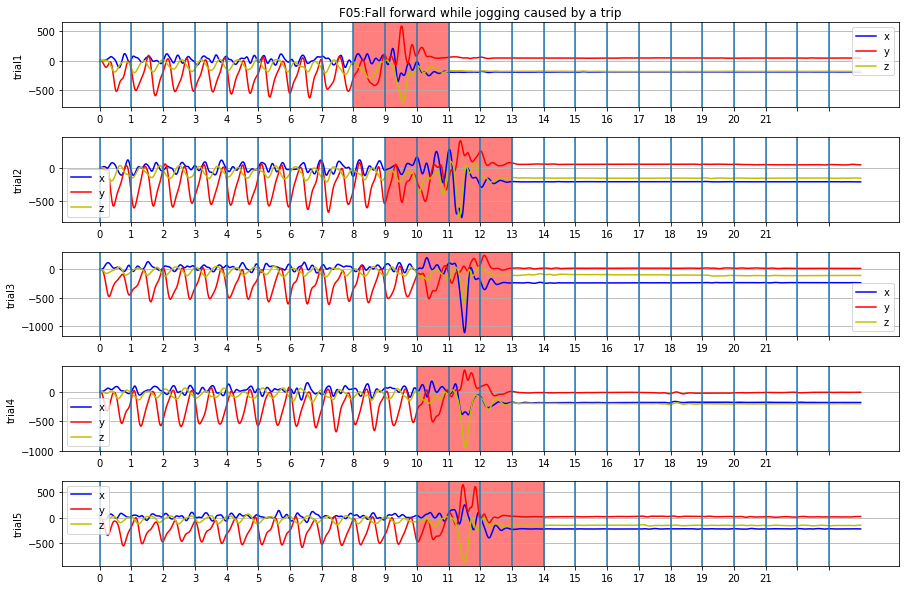

In [755]:
plot_trials(4, 'f')

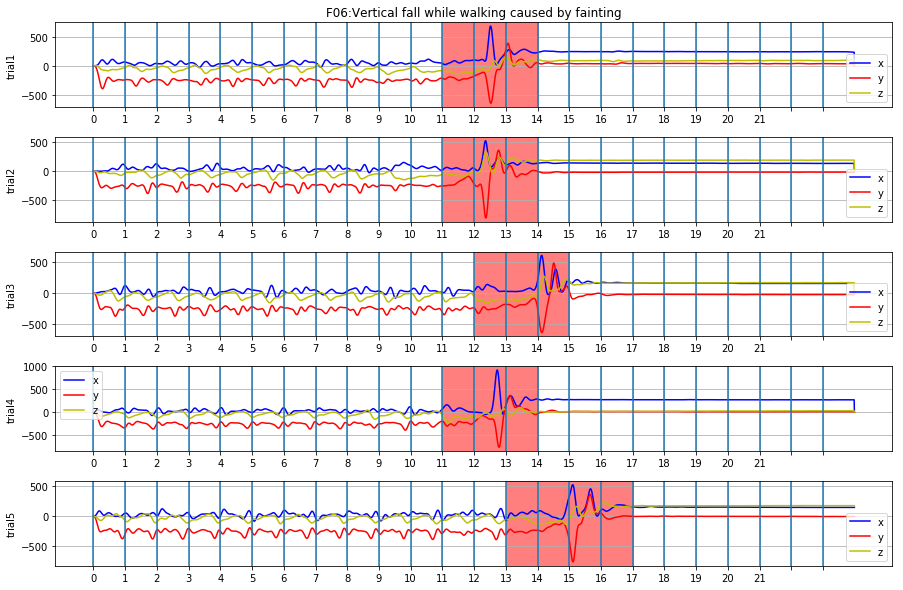

In [756]:
plot_trials(5, 'f')

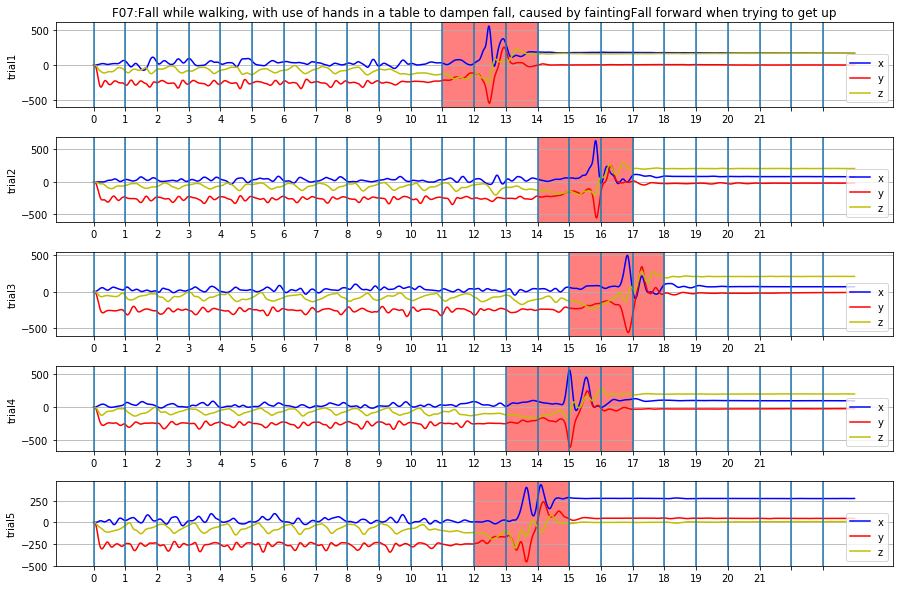

In [757]:
plot_trials(6, 'f')

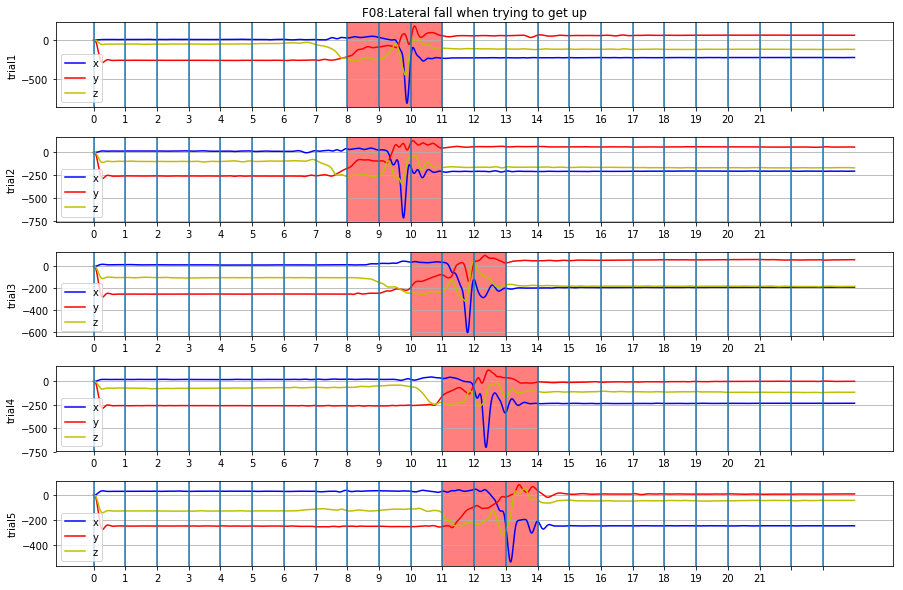

In [758]:
plot_trials(7, 'f')

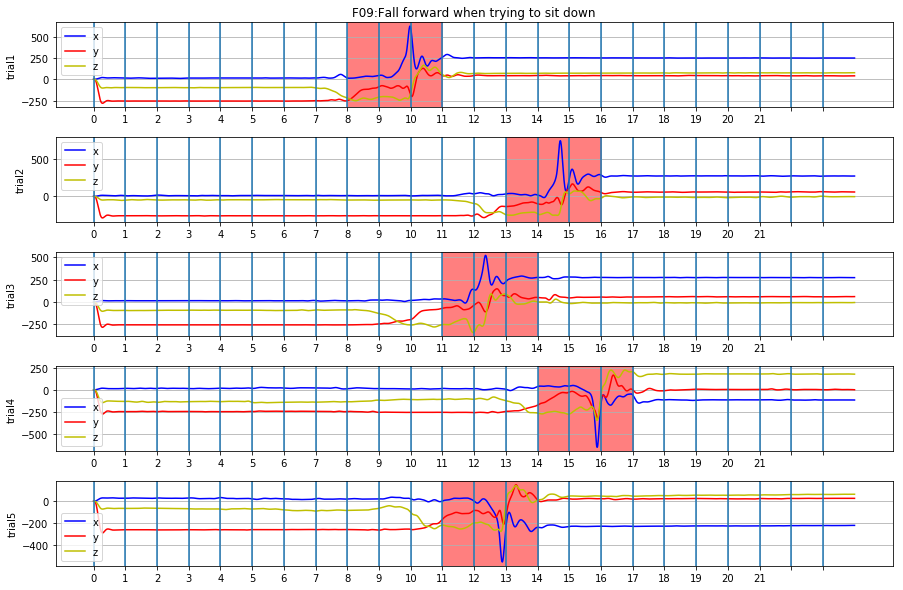

In [759]:
plot_trials(8, 'f')

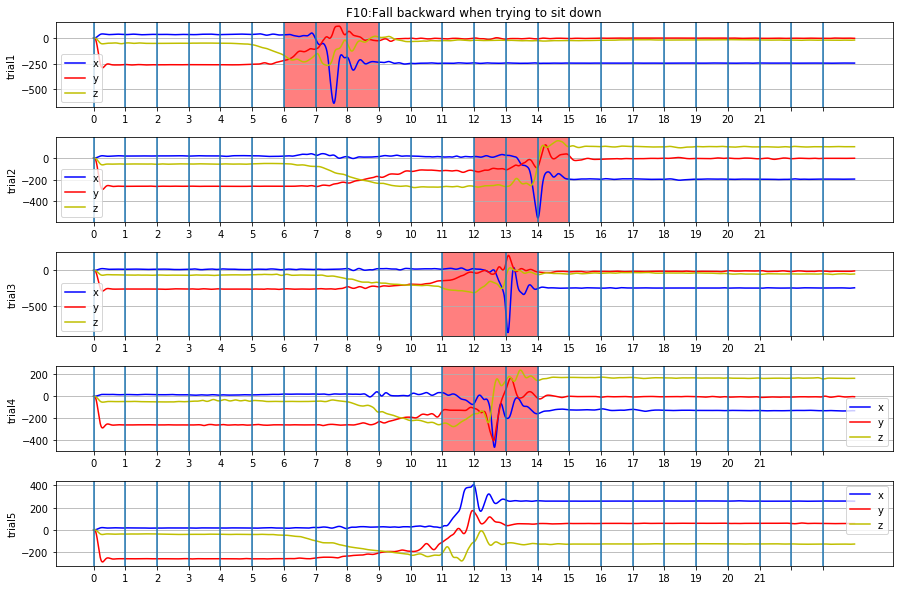

In [760]:
plot_trials(9, 'f')

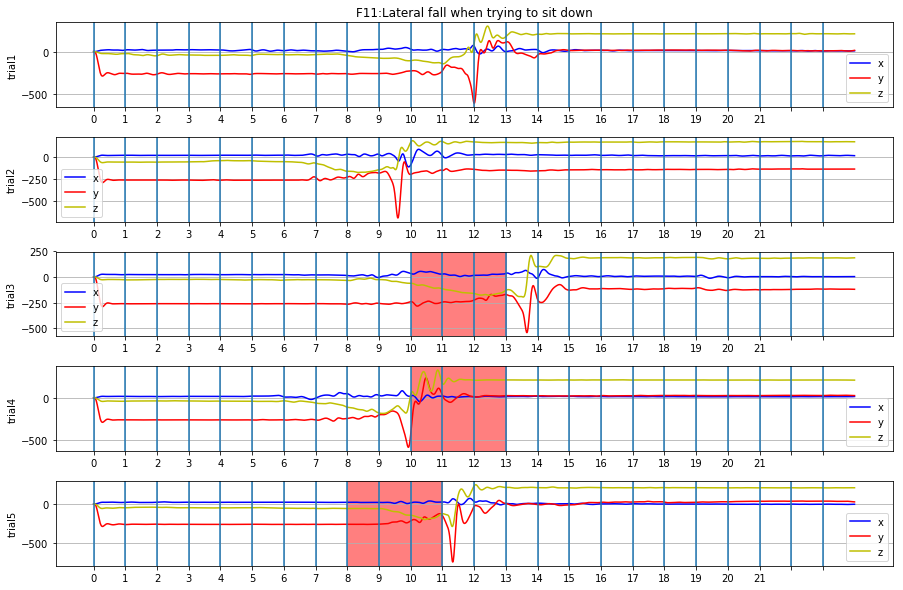

In [770]:
plot_trials(10, 'f')

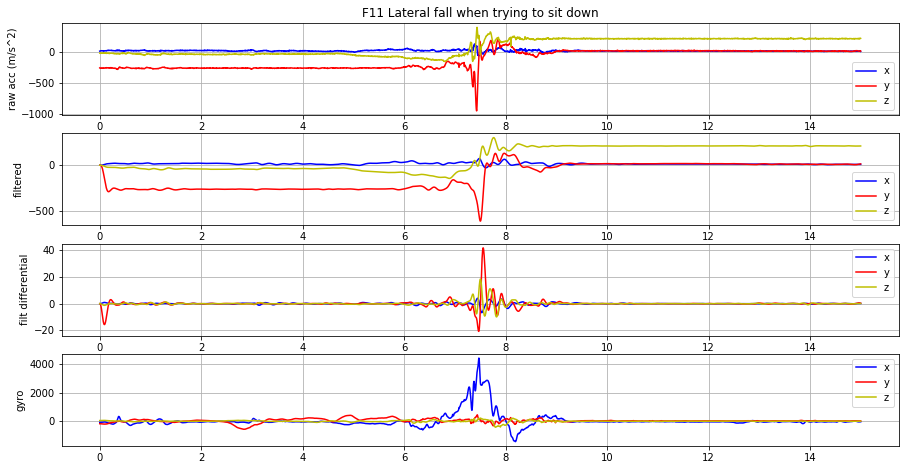

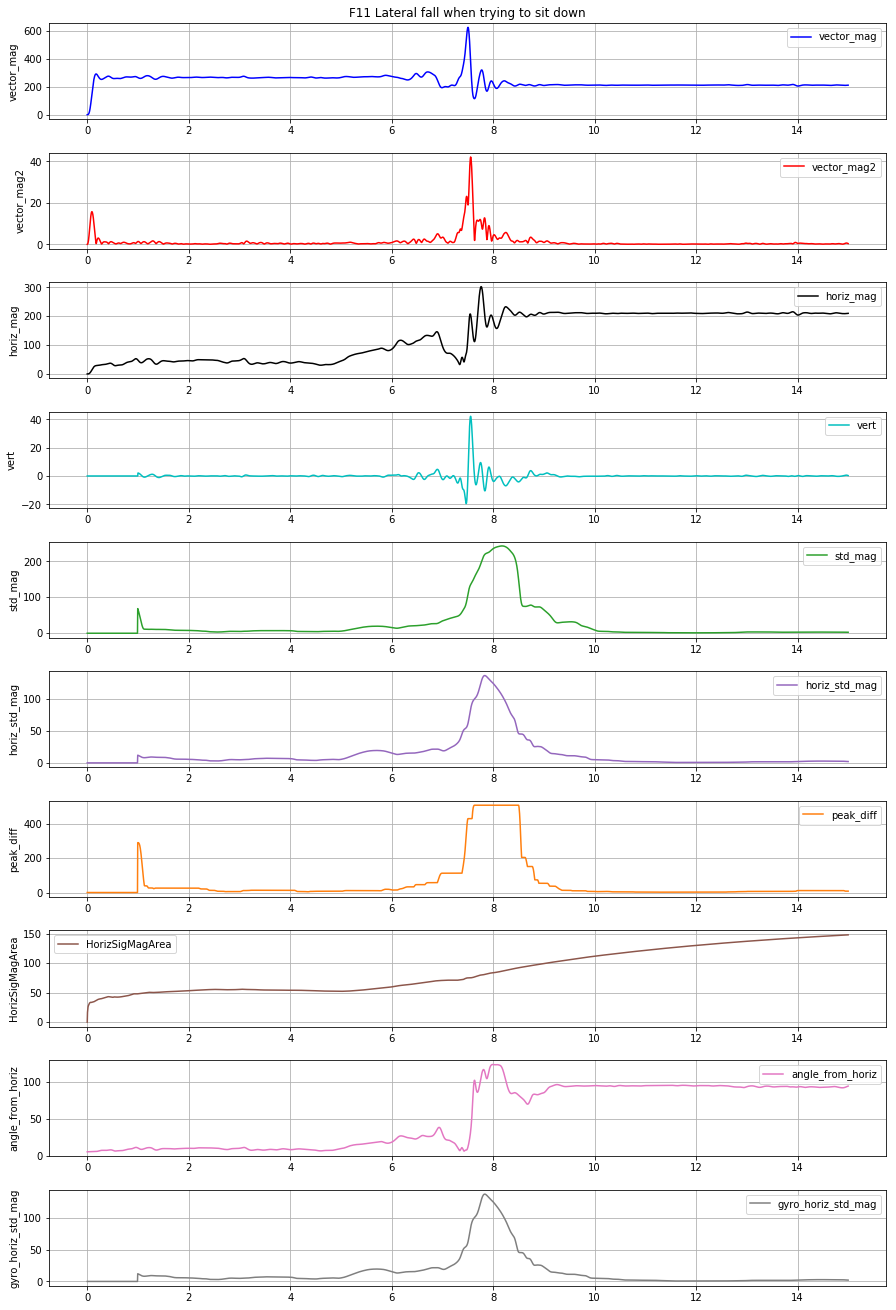

In [789]:
plot_trial(10, 0, 'f')

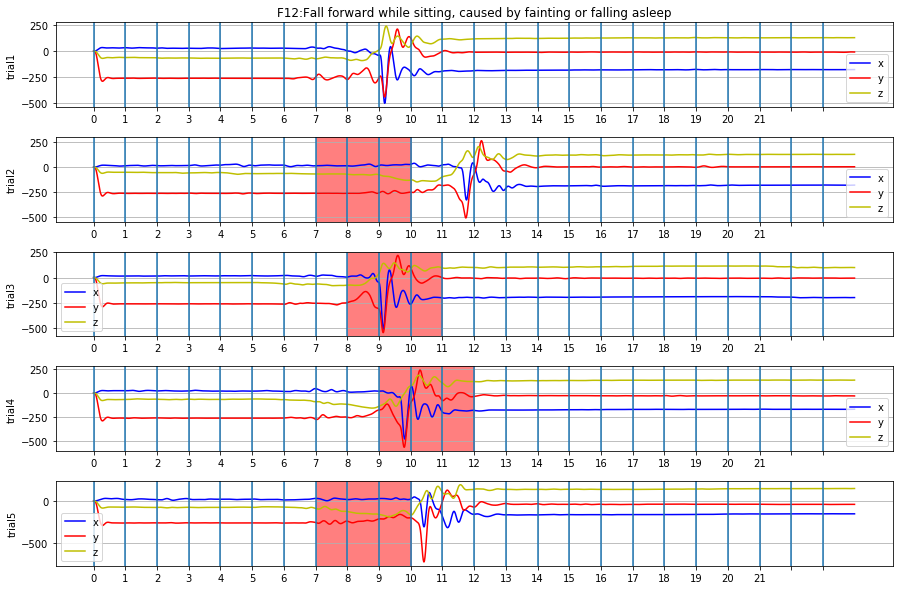

In [771]:
plot_trials(11, 'f')

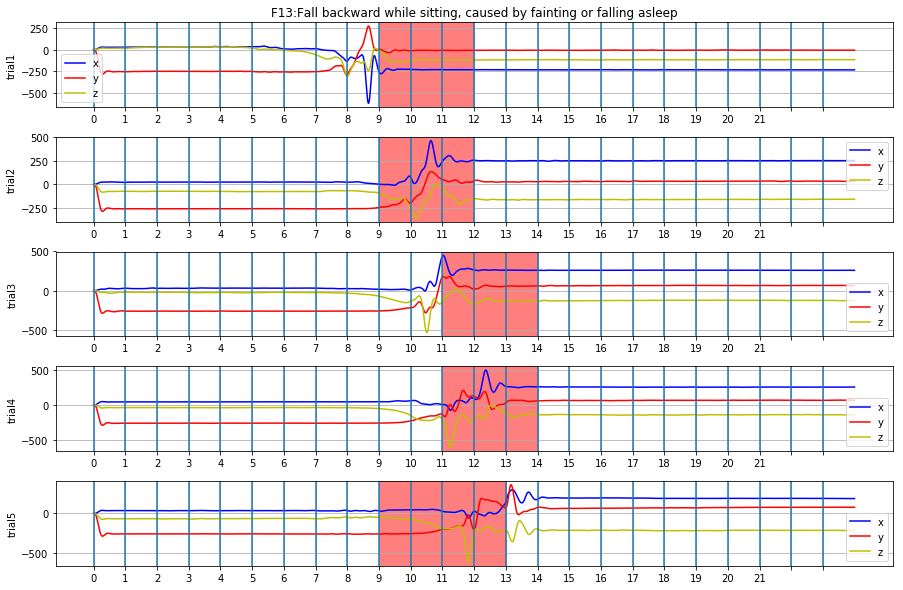

In [772]:
plot_trials(12, 'f')

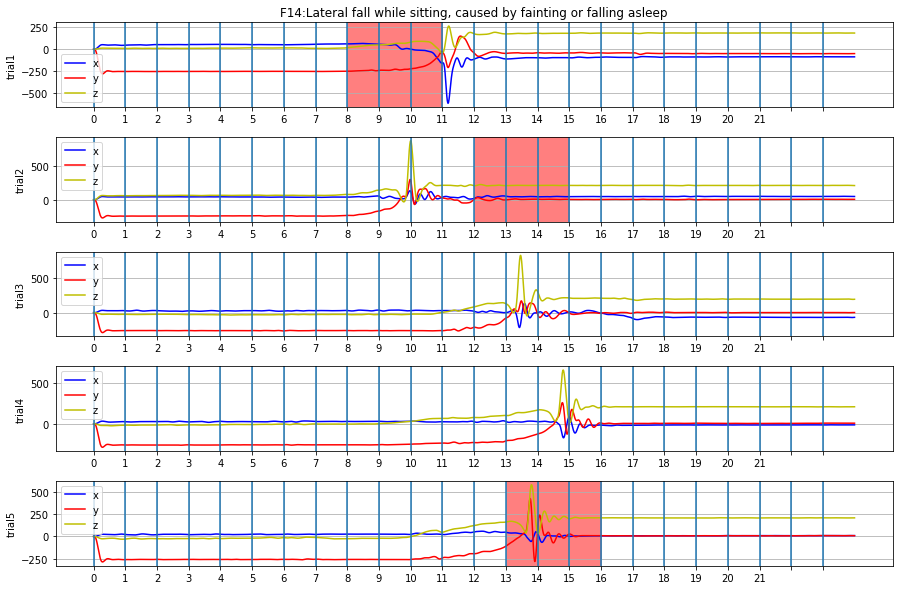

In [773]:
plot_trials(13, 'f')

### Correlations

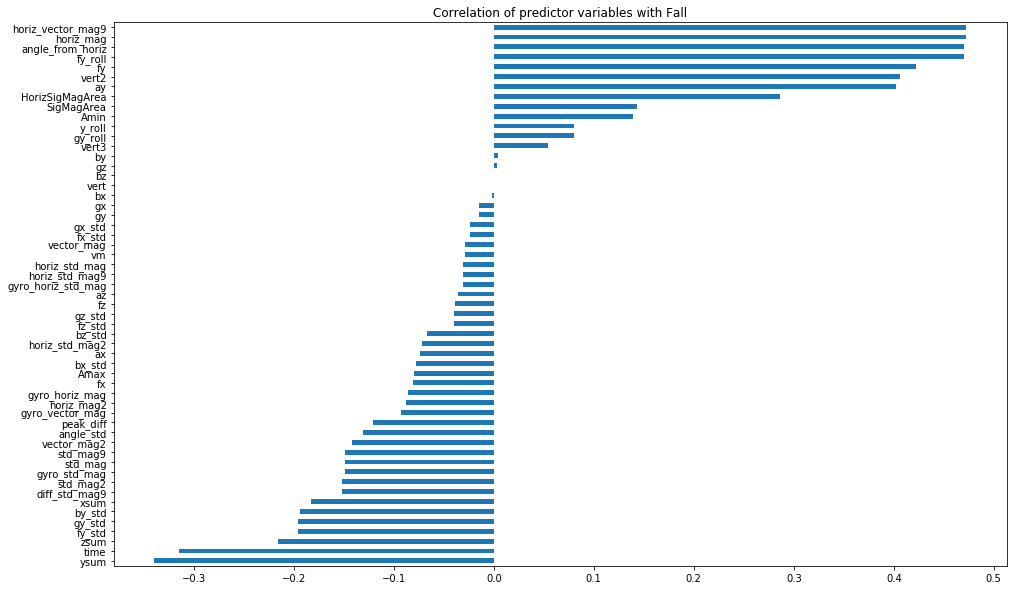

In [790]:
corr2 = all_df.corr()['Fall']
corr_rank2 = corr2.sort_values(ascending=False)

plt.subplots(figsize=(16,10))
crH2 = corr_rank2.sort_values(ascending=True)
crH2[:-1].plot(kind='barh')
plt.title('Correlation of predictor variables with Fall');

In [817]:
print('*ADL Horizontal Standard Deviation Magnitude max:', 
      adl_df.groupby('activity')['horiz_std_mag9'].max().max().round(3))
print('*Fall Horizontal Standard Deviation Magnitude min max:', 
      fall_df.groupby('activity')['horiz_std_mag9'].max().min().round(3))
# potential threshold 
print('*ADL Horizontal Vector Magnitude max:', 
      adl_df.groupby('activity')['horiz_vector_mag9'].max().max().round(3))
print('*Fall Horizontal Vector Magnitude min max:', 
      fall_df.groupby('activity')['horiz_vector_mag9'].max().min().round(3))
# potential threshold 

*ADL Horizontal Standard Deviation Magnitude max: 151.478
*Fall Horizontal Standard Deviation Magnitude min max: 175.402
*ADL Horizontal Vector Magnitude max: 497.831
*Fall Horizontal Vector Magnitude min max: 327.686


In [804]:
pivot1 = pd.pivot_table(all_df, index= 'activity', values= ["horiz_vector_mag9", 'horiz_std_mag9', 'vm', 'vector_mag2', 'angle_from_horiz', 'angle_std'], aggfunc= [min, max])
pivot1.head()

min                                             \
         angle_from_horiz angle_std horiz_std_mag9 horiz_vector_mag9   
activity                                                               
D01              0.065191       0.0            0.0          0.003138   
D02              0.262197       0.0            0.0          0.000332   
D03              0.119069       0.0            0.0          0.002237   
D04              0.068789       0.0            0.0          0.004444   
D05              0.119395       0.0            0.0          0.000353   

                                            max                            \
         vector_mag2        vm angle_from_horiz  angle_std horiz_std_mag9   
activity                                                                    
D01              0.0  0.006412        29.299727   7.323076      62.999091   
D02              0.0  0.008347        40.474339   9.450424      89.147400   
D03              0.0  0.003424       176.741195  40.135152      89.143918   
D04              0.0  0.013587       143.144573  35.940115     117.528490   
D05              0.0  0.008099        28.309281   7.668627      51.742472   

                                                    
         horiz_vector_mag9 vector_mag2          vm  
activity                                            
D01             144.188415   18.420106  387.506803  
D02             168.616450   20.828265  429.961519  
D03             208.760984   40.095295  631.528764  
D04             292.786763   55.395723  744.929436  
D05             133.507376   16.066333  432.663352

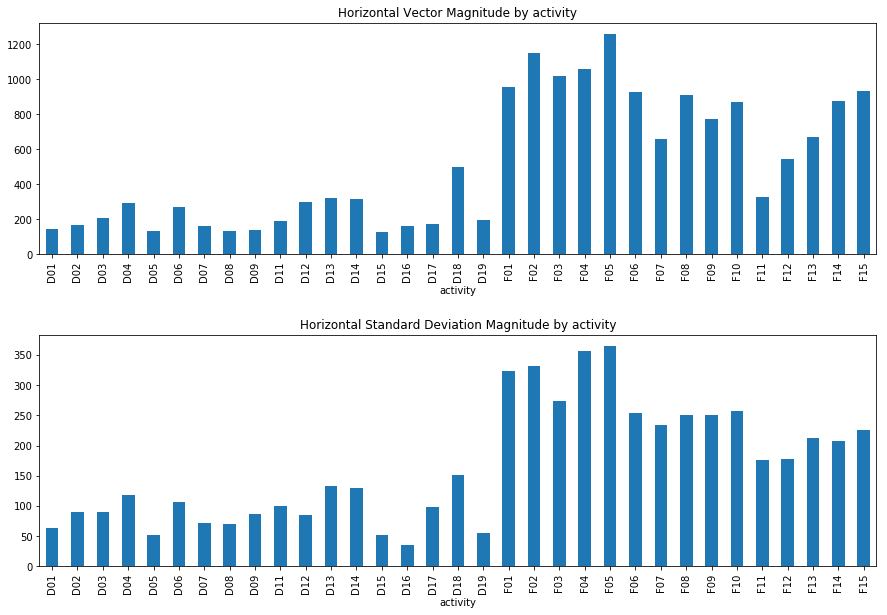

In [814]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
x = pivot1.loc[:, ('max', 'horiz_vector_mag9')]
x.plot(kind='bar')
plt.title('Horizontal Vector Magnitude by activity')

plt.subplot(2, 1, 2)
x = pivot1.loc[:, ('max', 'horiz_std_mag9')]
x.plot(kind='bar');
plt.title('Horizontal Standard Deviation Magnitude by activity');
plt.subplots_adjust(hspace=0.35);

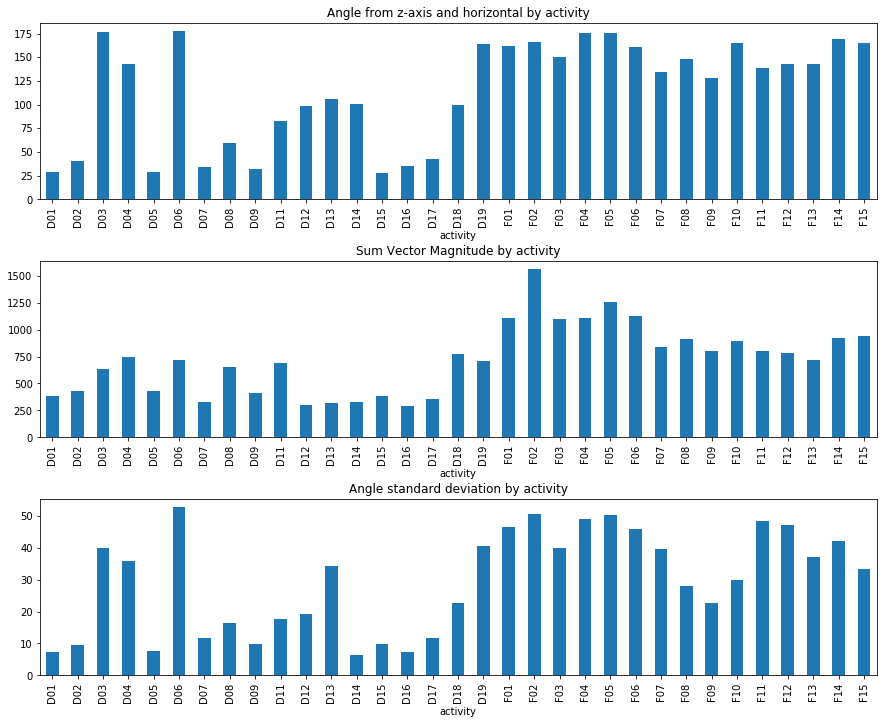

In [816]:
plt.figure(figsize=(15,12))
plt.subplot(3, 1, 1)
x = pivot1.loc[:, ('max', 'angle_from_horiz')]
x.plot(kind='bar')
plt.title('Angle from z-axis and horizontal by activity')

plt.subplot(3, 1, 2)
x = pivot1.loc[:, ('max', 'vm')]
x.plot(kind='bar')
plt.title('Sum Vector Magnitude by activity')

plt.subplot(3, 1, 3)
x = pivot1.loc[:, ('max', 'angle_std')]
x.plot(kind='bar');
plt.title('Angle standard deviation by activity')
plt.subplots_adjust(hspace=0.35);